<a href="https://colab.research.google.com/github/LoowdY/regressao_c02/blob/main/analises_co2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Importando bibliotecas necessárias
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Configurando o estilo dos gráficos
sns.set(style="whitegrid")

# Carregando o dataset
file_path = 'co2.csv'
dados = pd.read_csv(file_path)

In [2]:
# 1. Visualizando as primeiras linhas do dataset
print("Visualização inicial do dataset:")
print(dados.head())

Visualização inicial do dataset:
    Make       Model Vehicle Class  Engine Size(L)  Cylinders Transmission  \
0  ACURA         ILX       COMPACT             2.0          4          AS5   
1  ACURA         ILX       COMPACT             2.4          4           M6   
2  ACURA  ILX HYBRID       COMPACT             1.5          4          AV7   
3  ACURA     MDX 4WD   SUV - SMALL             3.5          6          AS6   
4  ACURA     RDX AWD   SUV - SMALL             3.5          6          AS6   

  Fuel Type  Fuel Consumption City (L/100 km)  \
0         Z                               9.9   
1         Z                              11.2   
2         Z                               6.0   
3         Z                              12.7   
4         Z                              12.1   

   Fuel Consumption Hwy (L/100 km)  Fuel Consumption Comb (L/100 km)  \
0                              6.7                               8.5   
1                              7.7                         

In [3]:
# 2. Informações gerais sobre o dataset
print("\nInformações gerais do dataset:")
print(dados.info())


Informações gerais do dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7385 entries, 0 to 7384
Data columns (total 12 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Make                              7385 non-null   object 
 1   Model                             7385 non-null   object 
 2   Vehicle Class                     7385 non-null   object 
 3   Engine Size(L)                    7385 non-null   float64
 4   Cylinders                         7385 non-null   int64  
 5   Transmission                      7385 non-null   object 
 6   Fuel Type                         7385 non-null   object 
 7   Fuel Consumption City (L/100 km)  7385 non-null   float64
 8   Fuel Consumption Hwy (L/100 km)   7385 non-null   float64
 9   Fuel Consumption Comb (L/100 km)  7385 non-null   float64
 10  Fuel Consumption Comb (mpg)       7385 non-null   int64  
 11  CO2 Emissions(g/km)               738

In [4]:
# 3. Estatísticas descritivas
print("\nEstatísticas descritivas do dataset:")
print(dados.describe())


Estatísticas descritivas do dataset:
       Engine Size(L)    Cylinders  Fuel Consumption City (L/100 km)  \
count     7385.000000  7385.000000                       7385.000000   
mean         3.160068     5.615030                         12.556534   
std          1.354170     1.828307                          3.500274   
min          0.900000     3.000000                          4.200000   
25%          2.000000     4.000000                         10.100000   
50%          3.000000     6.000000                         12.100000   
75%          3.700000     6.000000                         14.600000   
max          8.400000    16.000000                         30.600000   

       Fuel Consumption Hwy (L/100 km)  Fuel Consumption Comb (L/100 km)  \
count                      7385.000000                       7385.000000   
mean                          9.041706                         10.975071   
std                           2.224456                          2.892506   
min      

In [5]:
# 4. Verificando valores ausentes
print("\nValores ausentes por coluna:")
print(dados.isnull().sum())


Valores ausentes por coluna:
Make                                0
Model                               0
Vehicle Class                       0
Engine Size(L)                      0
Cylinders                           0
Transmission                        0
Fuel Type                           0
Fuel Consumption City (L/100 km)    0
Fuel Consumption Hwy (L/100 km)     0
Fuel Consumption Comb (L/100 km)    0
Fuel Consumption Comb (mpg)         0
CO2 Emissions(g/km)                 0
dtype: int64


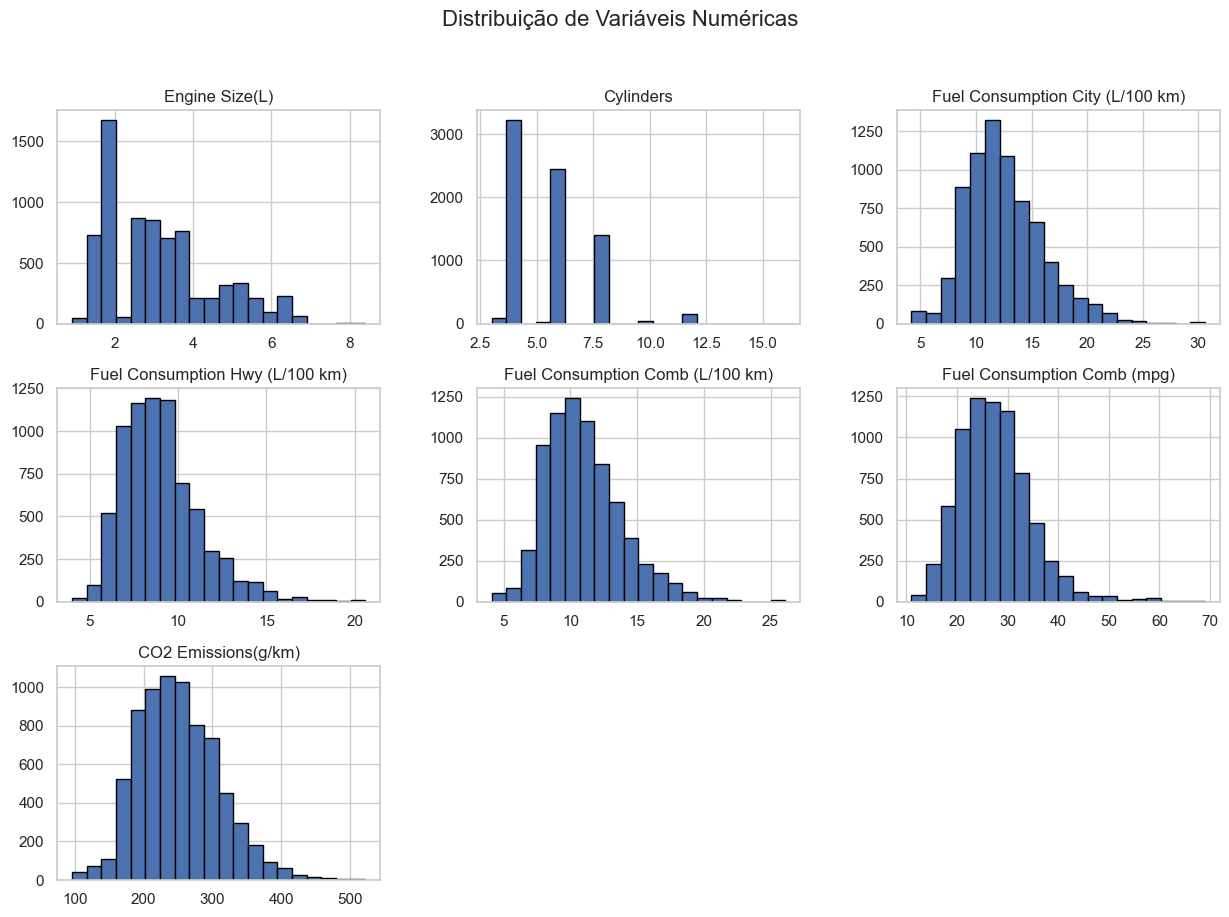

In [6]:
# 5. Distribuição de variáveis numéricas
dados.select_dtypes(include=['float64', 'int64']).hist(bins=20, figsize=(15, 10), edgecolor="black")
plt.suptitle("Distribuição de Variáveis Numéricas", fontsize=16)
plt.show()

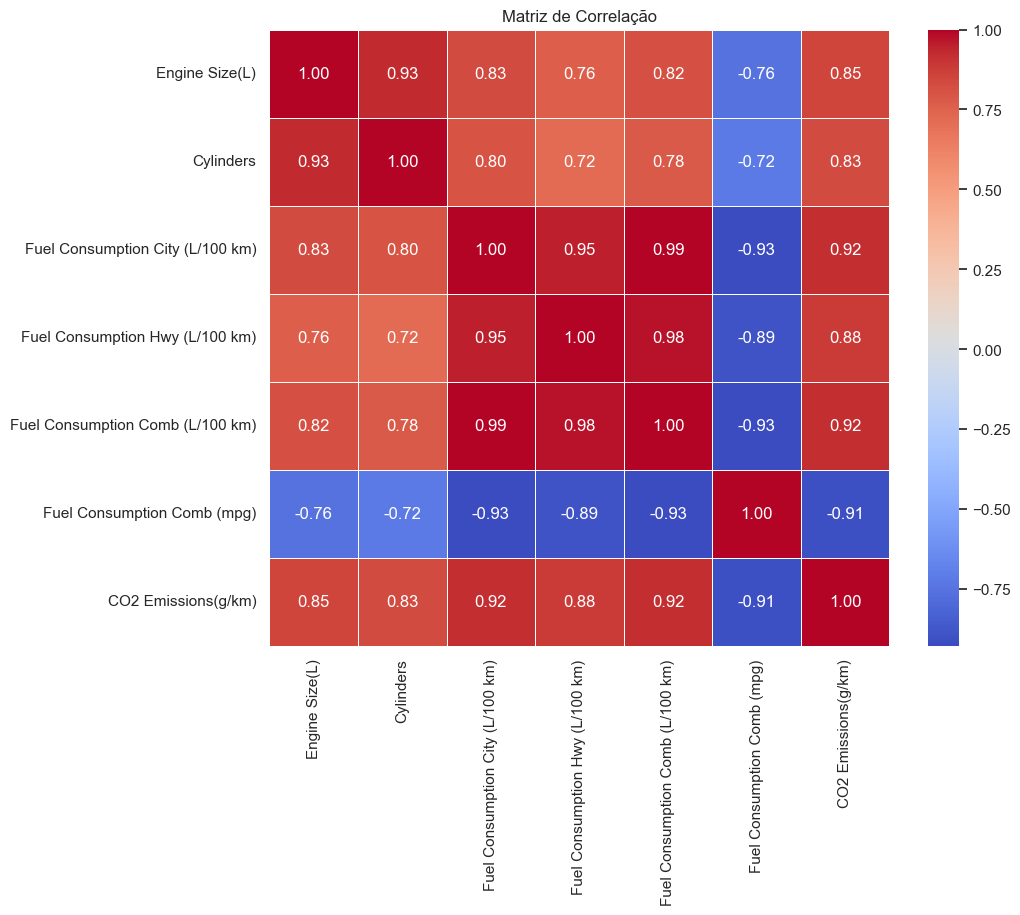

In [7]:
# 6. Matriz de correlação (apenas para variáveis numéricas)
dados_numericos = dados.select_dtypes(include=['float64', 'int64'])

if not dados_numericos.empty:
    plt.figure(figsize=(10, 8))
    sns.heatmap(dados_numericos.corr(), annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
    plt.title("Matriz de Correlação")
    plt.show()
else:
    print("\nNão há colunas numéricas para calcular a matriz de correlação.")


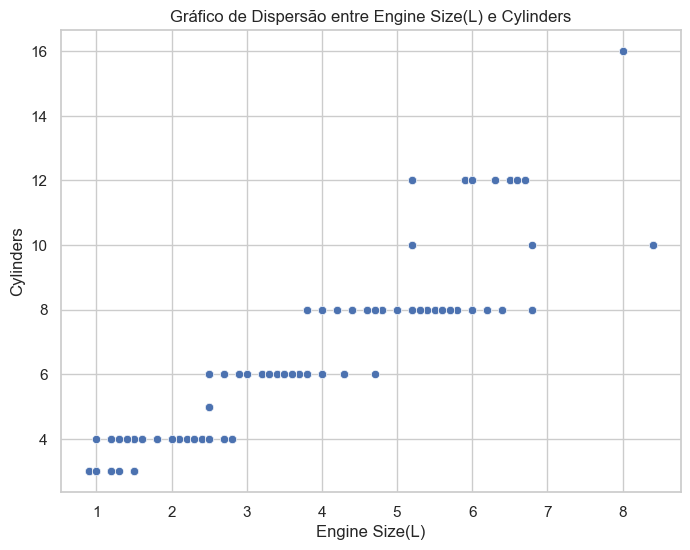

In [8]:
# 7. Gráficos de dispersão (se houver mais de uma variável numérica)
if len(dados_numericos.columns) > 1:
    plt.figure(figsize=(8, 6))
    sns.scatterplot(data=dados_numericos, x=dados_numericos.columns[0], y=dados_numericos.columns[1])
    plt.title(f"Gráfico de Dispersão entre {dados_numericos.columns[0]} e {dados_numericos.columns[1]}")
    plt.xlabel(dados_numericos.columns[0])
    plt.ylabel(dados_numericos.columns[1])
    plt.show()
else:
    print("\nNão há pares de variáveis numéricas suficientes para um gráfico de dispersão.")


C:\Users\usr\AppData\Local\Temp\ipykernel_13212\568593134.py:25: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=porcentagens, x=coluna, y='Porcentagem', palette="viridis")


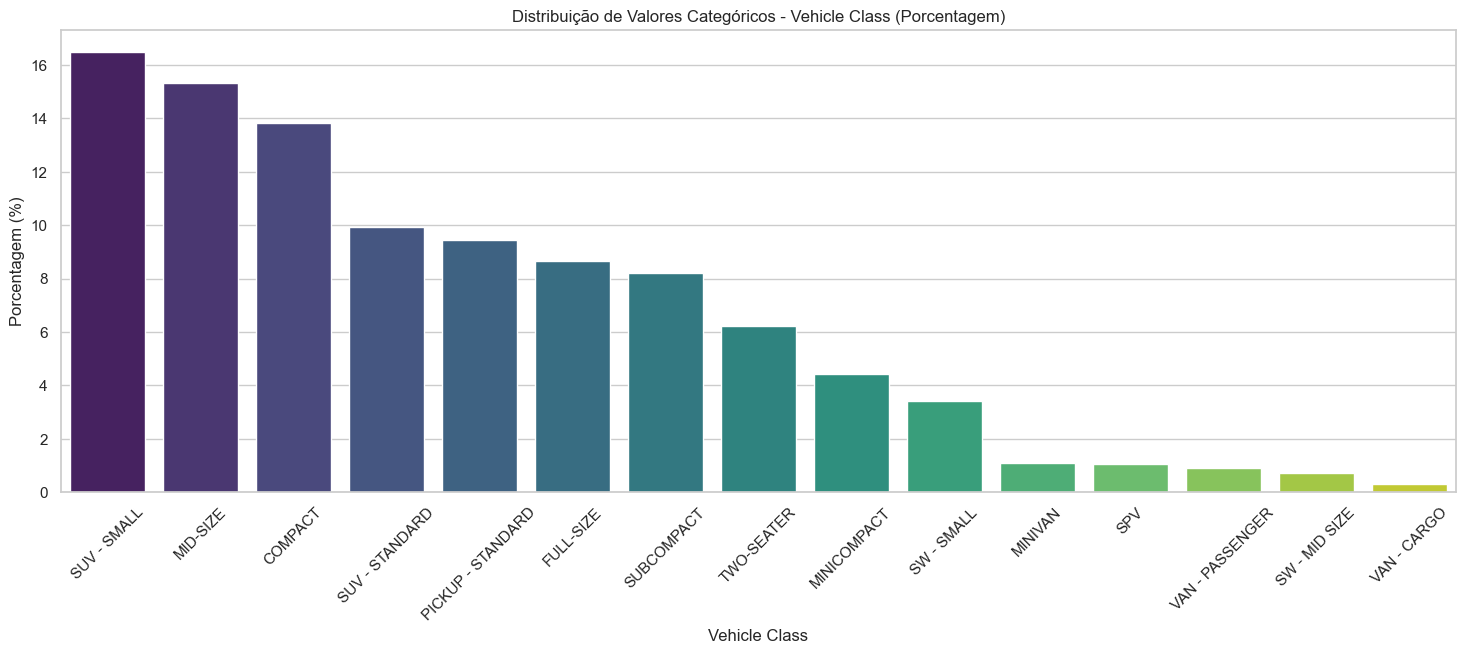

In [21]:
# Dicionário de mapeamento
mapeamento_classes = {
    "STATION WAGON - SMALL": "SW - SMALL",
    "PICKUP TRUCK - STANDARD": "PICKUP - STANDARD",
    "SPECIAL PURPOSE VEHICLE": "SPV",
    "STATION WAGON - MID-SIZE": "SW - MID SIZE",
    "PICKUP TRUCK - SMALL": "PICKUP - STANDARD",
}

# Verificar se há colunas categóricas
dados_categoricos = dados.select_dtypes(include=['object'])

if not dados_categoricos.empty:
    for coluna in dados_categoricos.columns:
        if coluna == 'Vehicle Class':
            # Aplicar o mapeamento na coluna 'Vehicle Class'
            dados[coluna] = dados[coluna].replace(mapeamento_classes)

            # Calcular porcentagens
            porcentagens = (dados[coluna].value_counts(normalize=True) * 100).reset_index()
            porcentagens.columns = [coluna, 'Porcentagem']

            # Gerar o gráfico com porcentagens
            plt.figure(figsize=(18, 6))
            sns.barplot(data=porcentagens, x=coluna, y='Porcentagem', palette="viridis")
            plt.title(f"Distribuição de Valores Categóricos - {coluna} (Porcentagem)")
            plt.ylabel("Porcentagem (%)")
            plt.xlabel(coluna)
            plt.xticks(rotation=45)
            plt.show()
else:
    print("\nNão há colunas categóricas para análise.")


In [16]:
print(dados['Make'].unique())

['ACURA' 'ALFA ROMEO' 'ASTON MARTIN' 'AUDI' 'BENTLEY' 'BMW' 'BUICK'
 'CADILLAC' 'CHEVROLET' 'CHRYSLER' 'DODGE' 'FIAT' 'FORD' 'GMC' 'HONDA'
 'HYUNDAI' 'INFINITI' 'JAGUAR' 'JEEP' 'KIA' 'LAMBORGHINI' 'LAND ROVER'
 'LEXUS' 'LINCOLN' 'MASERATI' 'MAZDA' 'MERCEDES-BENZ' 'MINI' 'MITSUBISHI'
 'NISSAN' 'PORSCHE' 'RAM' 'ROLLS-ROYCE' 'SCION' 'SMART' 'SRT' 'SUBARU'
 'TOYOTA' 'VOLKSWAGEN' 'VOLVO' 'GENESIS' 'BUGATTI']


C:\Users\usr\AppData\Local\Temp\ipykernel_13212\2046538308.py:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=dados_grupo, x=coluna_categoria, y=coluna_numerica, palette="Set3")


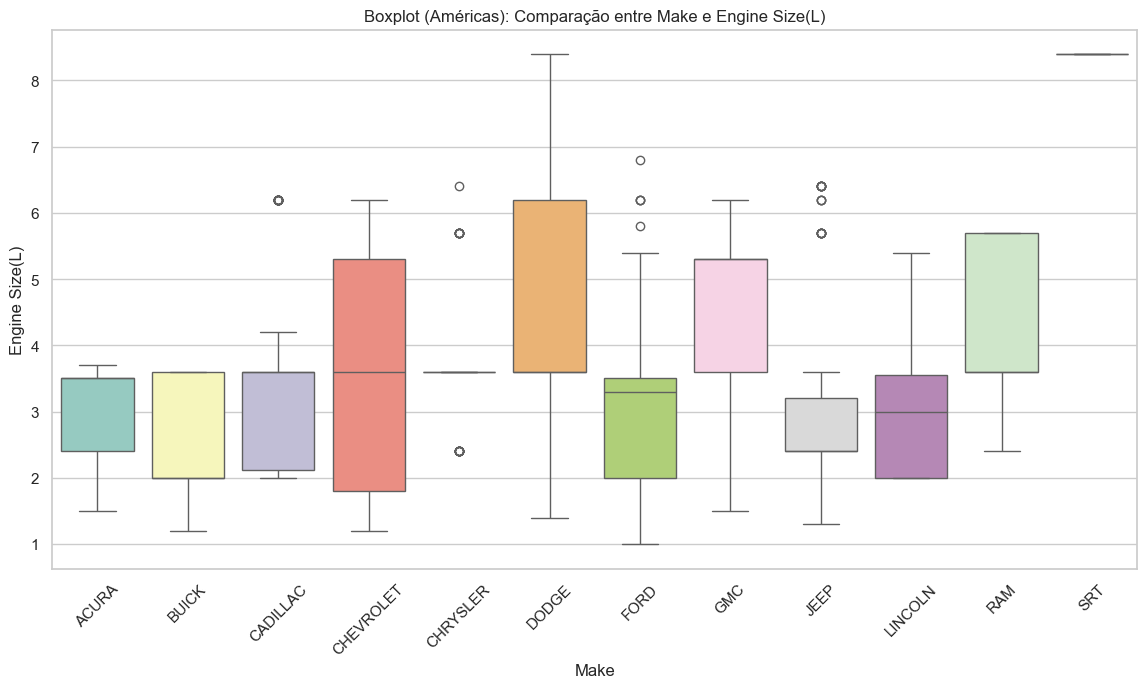

C:\Users\usr\AppData\Local\Temp\ipykernel_13212\2046538308.py:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=dados_grupo, x=coluna_categoria, y=coluna_numerica, palette="Set3")


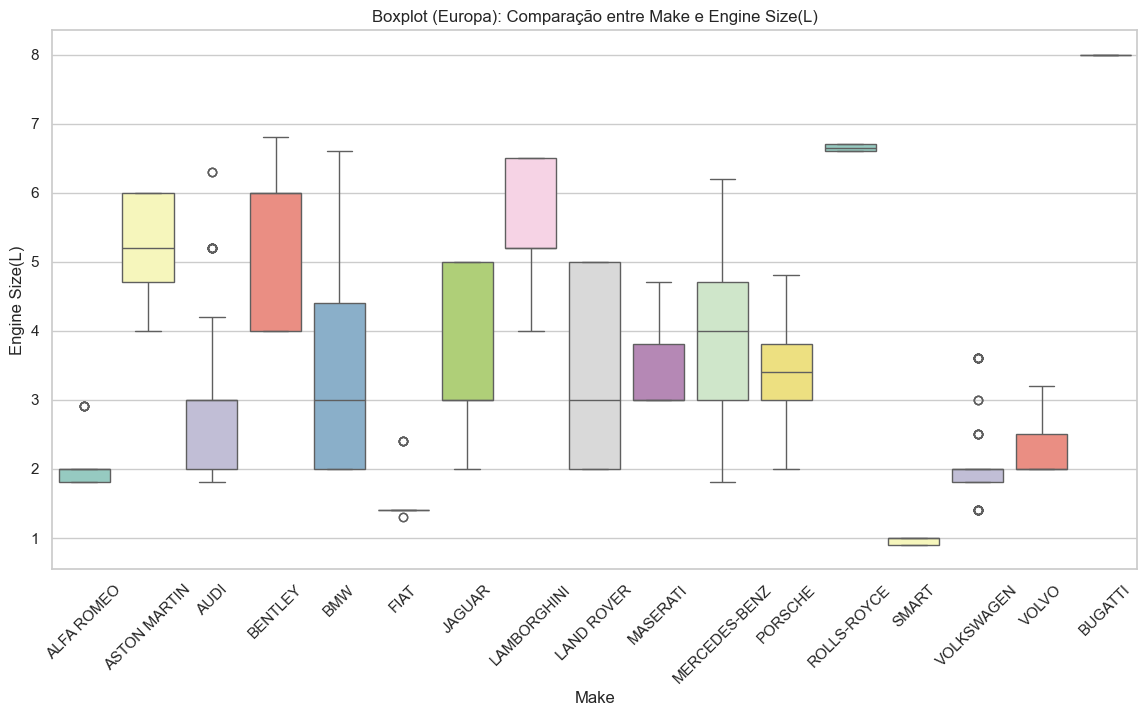

C:\Users\usr\AppData\Local\Temp\ipykernel_13212\2046538308.py:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=dados_grupo, x=coluna_categoria, y=coluna_numerica, palette="Set3")


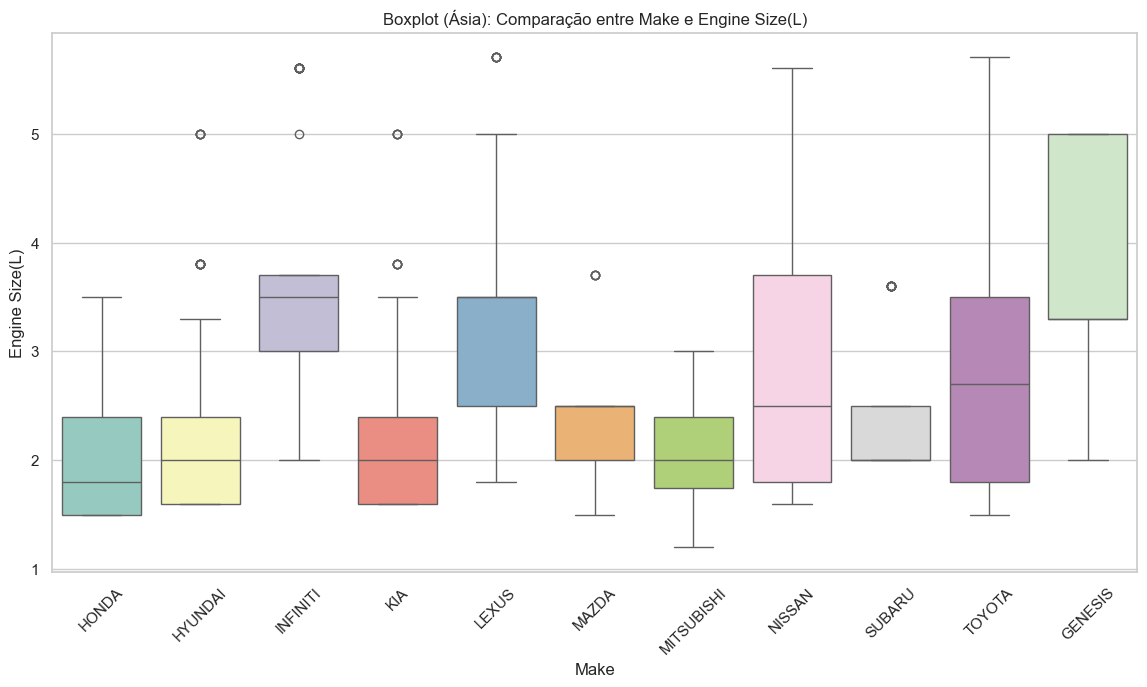

In [20]:
# Grupos de países e marcas
grupos = {
    "Américas": ['ACURA', 'BUICK', 'CADILLAC', 'CHEVROLET', 'CHRYSLER', 'DODGE', 'FORD',
                 'GMC', 'JEEP', 'LINCOLN', 'RAM', 'SRT', 'TESLA'],
    "Europa": ['AUDI', 'BMW', 'MERCEDES-BENZ', 'PORSCHE', 'SMART', 'VOLKSWAGEN', 'ALFA ROMEO',
               'FIAT', 'LAMBORGHINI', 'MASERATI', 'ASTON MARTIN', 'BENTLEY', 'JAGUAR',
               'LAND ROVER', 'ROLLS-ROYCE', 'VOLVO', 'BUGATTI'],
    "Ásia": ['HONDA', 'INFINITI', 'LEXUS', 'MAZDA', 'MITSUBISHI', 'NISSAN', 'SUBARU', 'TOYOTA',
             'HYUNDAI', 'KIA', 'GENESIS']
}

# Verificar se há colunas categóricas e numéricas
if not dados_categoricos.empty and not dados_numericos.empty:
    coluna_categoria = dados_categoricos.columns[0]
    coluna_numerica = dados_numericos.columns[0]

    for grupo, marcas in grupos.items():
        # Filtrar os dados para o grupo de marcas
        dados_grupo = dados[dados[coluna_categoria].isin(marcas)]
        
        if not dados_grupo.empty:
            plt.figure(figsize=(14, 7))
            sns.boxplot(data=dados_grupo, x=coluna_categoria, y=coluna_numerica, palette="Set3")
            plt.title(f"Boxplot ({grupo}): Comparação entre {coluna_categoria} e {coluna_numerica}")
            plt.xticks(rotation=45)
            plt.show()
else:
    print("\nNão há colunas categóricas e numéricas para análise comparativa.")



In [ ]:
from scipy.stats import ttest_ind, pearsonr, chi2_contingency
import numpy as np

# Exemplo 1: Teste t de Student (comparando médias de dois grupos)
# Comparar emissões de CO2 entre dois tipos de combustível
grupo1 = dados[dados['Fuel Type'] == 'Z']['CO2 Emissions(g/km)']
grupo2 = dados[dados['Fuel Type'] == 'D']['CO2 Emissions(g/km)']

# Verificando as médias e executando o teste t
print("Média do Grupo 1 (Combustível Z):", grupo1.mean())
print("Média do Grupo 2 (Combustível D):", grupo2.mean())
t_stat, p_value = ttest_ind(grupo1, grupo2, equal_var=False)
print("Teste t: Estatística =", t_stat, ", P-valor =", p_value)


Média do Grupo 1 (Combustível Z): 266.0434103685197
Média do Grupo 2 (Combustível D): 237.54857142857142
Teste t: Estatística = 8.592856789515716 , P-valor = 1.915558060959375e-15


In [ ]:
# Exemplo 2: Teste de correlação de Pearson
# Correlação entre Tamanho do Motor e Emissões de CO2
x = dados['Engine Size(L)']
y = dados['CO2 Emissions(g/km)']
corr, p_value = pearsonr(x, y)
print("\nCorrelação de Pearson:")
print("Coeficiente de Correlação =", corr)
print("P-valor =", p_value)



Correlação de Pearson:
Coeficiente de Correlação = 0.8511446437900011
P-valor = 0.0


In [ ]:
# Exemplo 3: Teste qui-quadrado
# Testando associação entre Tipo de Combustível e Classe do Veículo
tabela_contingencia = pd.crosstab(dados['Fuel Type'], dados['Vehicle Class'])
chi2, p, dof, expected = chi2_contingency(tabela_contingencia)
print("\nTeste Qui-Quadrado:")
print("Estatística Qui-Quadrado =", chi2)
print("P-valor =", p)



Teste Qui-Quadrado:
Estatística Qui-Quadrado = 2648.3077211182026
P-valor = 0.0


In [ ]:
# Exemplo 4: Intervalo de confiança para média de emissões de CO2
# Calculando intervalo de confiança para a média de emissões de CO2
co2 = dados['CO2 Emissions(g/km)']
media = np.mean(co2)
desvio_padrao = np.std(co2, ddof=1)
n = len(co2)
intervalo = 1.96 * (desvio_padrao / np.sqrt(n))  # 1.96 para 95% de confiança
print("\nIntervalo de Confiança (95%) para Média de Emissões de CO2:")
print(f"({media - intervalo:.2f}, {media + intervalo:.2f})")



Intervalo de Confiança (95%) para Média de Emissões de CO2:
(249.25, 251.92)
